<a href="https://colab.research.google.com/github/nykolai-d/k-nearest-neighbor_1/blob/main/k_nearest_neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the data
import io
from google.colab import files

uploaded = files.upload()

Saving classified_data.csv to classified_data.csv


In [3]:
raw_data = pd.read_csv('classified_data.csv')

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


In [5]:
raw_data.columns

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')

In [6]:
raw_data

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [7]:
# Fixing the unnamed column at the left
raw_data = pd.read_csv('classified_data.csv', index_col = 0)

In [8]:
raw_data

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


We standarize the data by adjusting every x value so that they are roughly on the same scale.

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit(raw_data.drop('TARGET CLASS', axis=1))
scaled_features = scaler.transform(raw_data.drop('TARGET CLASS', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis=1).columns)

In [11]:
# Splitting the data set into training and test data
from sklearn.model_selection import train_test_split

In [12]:
x = scaled_data

y = raw_data['TARGET CLASS']

In [13]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

In [14]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier

In [15]:
model = KNeighborsClassifier(n_neighbors = 1)

In [16]:
model.fit(x_training_data, y_training_data)

KNeighborsClassifier(n_neighbors=1)

In [17]:
# Making predictions
predictions = model.predict(x_test_data)

In [18]:
# Measuring the accuracy of the model

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

In [19]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       149
           1       0.90      0.93      0.92       151

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [20]:
print(confusion_matrix(y_test_data, predictions))

[[133  16]
 [ 10 141]]


The model appears to be performant, but it can be improved by finding a better-suited value for $k$.<br/>
To this end, the elbow method will be used. This methog involves iterating through different $k$ values and selecting the value with the lowest error rate when applied to the test data.

In [21]:
error_rates = []

In [22]:
for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(x_training_data, y_training_data)

    new_predictions = new_model.predict(x_test_data)

    error_rates.append(np.mean(new_predictions != y_test_data))

In [23]:
error_rates

[0.08666666666666667,
 0.08666666666666667,
 0.08333333333333333,
 0.07666666666666666,
 0.08,
 0.07333333333333333,
 0.06666666666666667,
 0.07,
 0.08,
 0.07666666666666666,
 0.08,
 0.08,
 0.06666666666666667,
 0.07,
 0.07,
 0.07333333333333333,
 0.07333333333333333,
 0.07,
 0.07,
 0.07333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.06333333333333334,
 0.06333333333333334,
 0.06,
 0.06666666666666667,
 0.06333333333333334,
 0.06666666666666667,
 0.06666666666666667,
 0.06333333333333334,
 0.06,
 0.06,
 0.06333333333333334,
 0.06333333333333334,
 0.06666666666666667,
 0.06333333333333334,
 0.06666666666666667,
 0.06,
 0.056666666666666664,
 0.06,
 0.06,
 0.06,
 0.05333333333333334,
 0.06,
 0.056666666666666664,
 0.06,
 0.06,
 0.06333333333333334,
 0.056666666666666664,
 0.06,
 0.06,
 0.06,
 0.06333333333333334,
 0.06,
 0.06333333333333334,
 0.06333333333333334,
 0.06333333333333334,
 0.06333333333333334,
 0.06333333333333334,
 0.056666666666666664,
 0.06333333333333334,

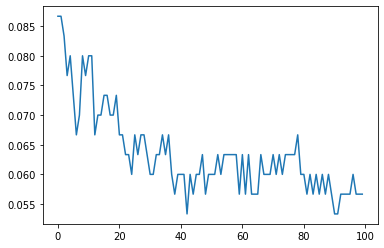

In [24]:
plt.plot(error_rates)

**Conclusion**: The error rates are minimized with $k=50$

**References**

Nick McCullum https://nickmccullum.com/